In [44]:
library(rstan)
library(codetools)
options(mc.cores=parallel::detectCores(), repr.plot.height=7, repr.plot.width=7, repr.plot.res=200)
rstan_options(auto_write=T)

# Exercise 1

In [45]:
X <- 2:10
Y <- c(105.5203, 227.4457, 405.6937, 661.2858, 886.1422, 1189.6514, 1631.8262, 1951.8381, 2528.5246)
s <- c(15.40459, 36.05480, 51.84040, 94.66744, 123.79828, 216.99935, 173.83507, 318.46511, 427.27788)
data <- list(n=length(X), X=X, Y=Y, s=s)
code <- "data{
    int<lower=0> n;
    vector[n] X;
    vector[n] Y;
    vector<lower=0>[n] s;
}
parameters{
    real b0;
    real<lower=-1, upper=1> b1;
    real b2;
}
model{
    b0 ~ normal(5, 1);
    b2 ~ normal(30, 15);
    for (i in 1:n){
        Y[i] ~ normal(b0 + b1 * X[i] + b2 * square(X[i]), s[i]);
    }
}"
fit <- stan(model_code=code, data=data, iter=3e3, warmup=1e3, chains=4)
print(fit, probs = c(0.025, 0.975))

recompiling to avoid crashing R session



Inference for Stan model: anon_model.
4 chains, each with iter=3000; warmup=1000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

      mean se_mean   sd  2.5% 97.5% n_eff Rhat
b0    4.99    0.01 0.99  3.11  6.96  8065    1
b1   -0.01    0.01 0.57 -0.95  0.94  9398    1
b2   25.03    0.01 1.20 22.64 27.43  6788    1
lp__ -2.46    0.02 1.29 -5.81 -0.99  3829    1

Samples were drawn using NUTS(diag_e) at Sun Jun  8 16:40:36 2025.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [46]:
post <- extract(fit)
b0.mean <- mean(post$b0)
b1.mean <- mean(post$b1)
b2.mean <- mean(post$b2)

xs <- seq(2, 10, length.out=200)
ys <- b0.mean + b1.mean * xs + b2.mean * xs ** 2

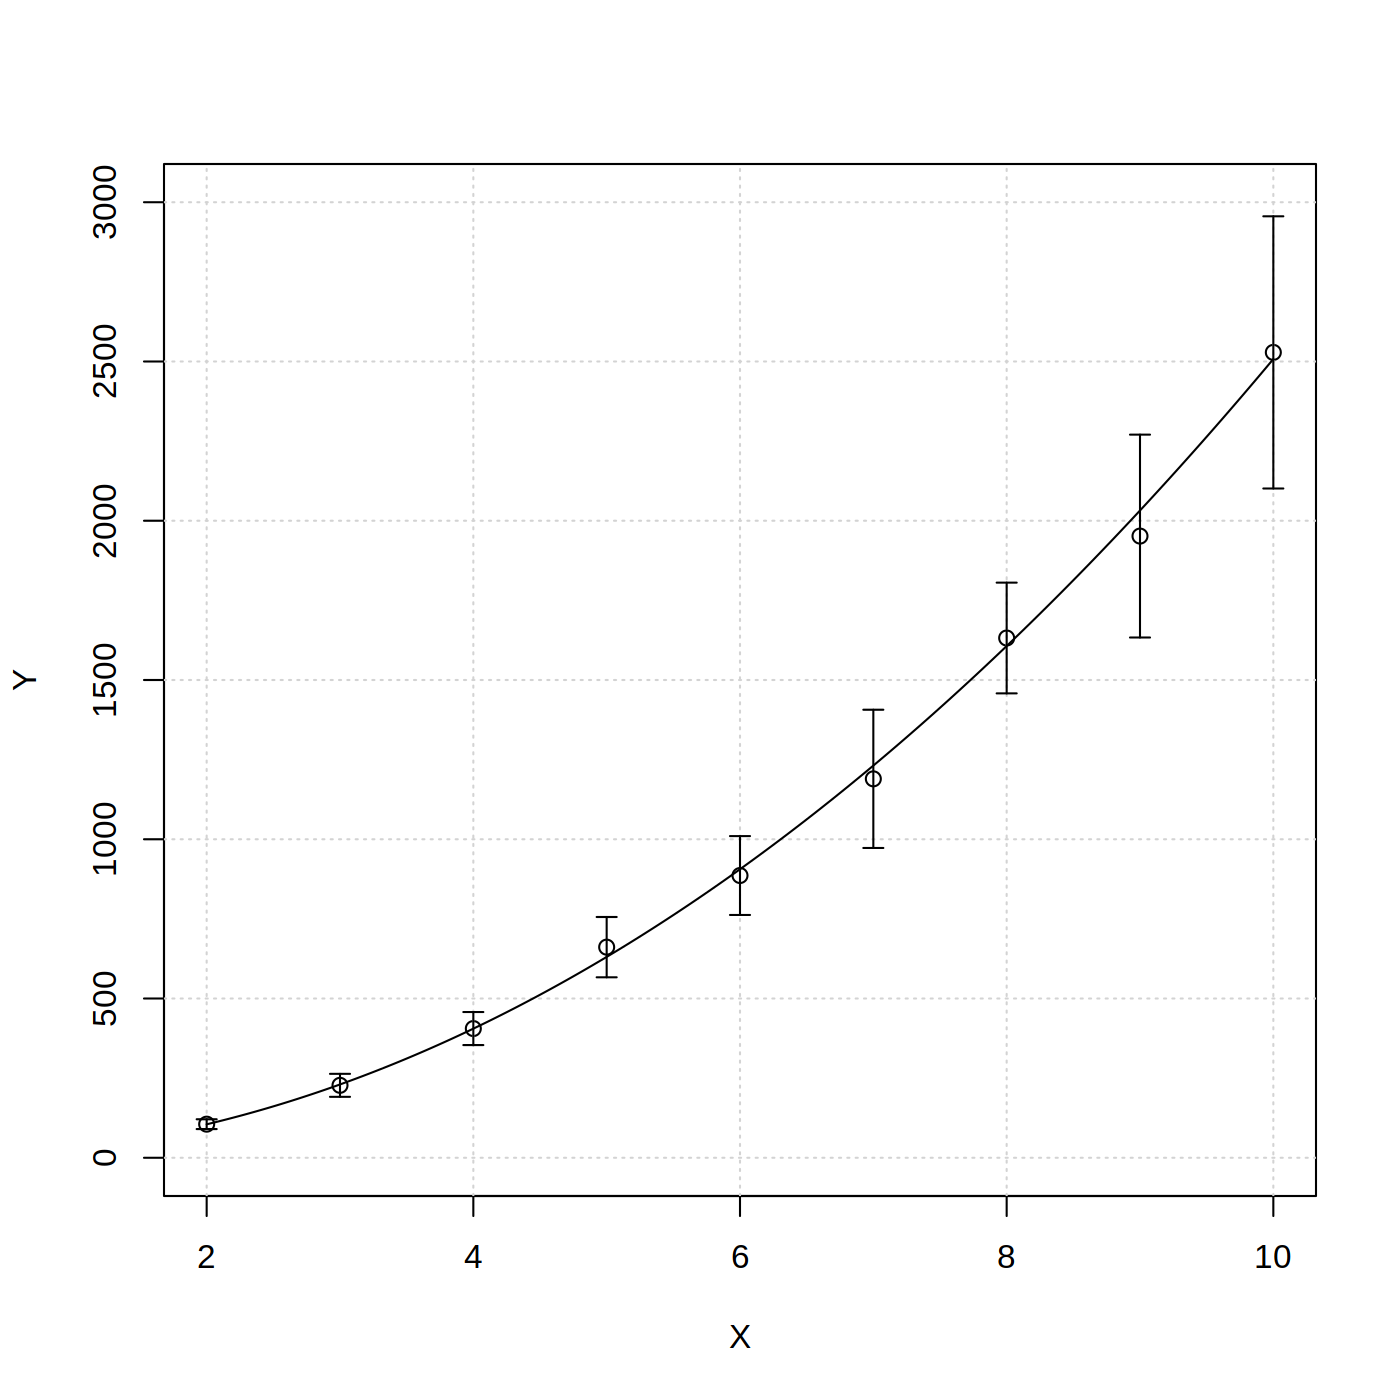

In [47]:
plot(X,Y, ylim=c(0,3000))
grid()
par(new=T)
arrows(X, Y-s, X, Y+s, length=0.05, angle=90, code=3)
lines(xs,ys)

# Exercise 2

In [48]:
n <- 115; y <- 10; y / n

[1] 0.08695652

In [49]:
a.prior <- 1
b.prior <- 11

a.post <- a.prior + y
b.post <- b.prior + n - y

In [50]:
m.post <- a.post / (a.post + b.post)
var.post <- (a.post * b.post) / ((a.post + b.post) ** 2 * (a.post + b.post + 1))
low <- qbeta(.025, a.post, b.post)
up <- qbeta(.975, a.post, b.post)
cat("\nmean:", m.post)
cat("\nvariance:", var.post)
cat("\n95% CI:", low, up)


mean: 0.08661417
variance: 0.0006180637
95% CI: 0.04438876 0.1411131

In [51]:
p <- 0.1
p.value <- 2 * min(pbinom(y, n, p), 1 - pbinom(y-1, n, p))

cat("\np-value:", p.value, ifelse(p.value < 0.05, "reject H0", "non reject H0"))
cat("\nbayesian: 95% CI:", ifelse(p >= low & p <= up, "non reject H0", "reject H0"))


p-value: 0.7854313 non reject H0


bayesian: 95% CI: non reject H0

In [52]:
n <- 165 
y <- 9
p <- y / n
p

[1] 0.05454545

In [53]:
a.prior <- 1
b.prior <- 10

a.post <- a.prior + y
b.post <- b.prior + n - y

m.post <- a.post / (a.post + b.post)
cat("\nbayesian estimator:", m.post)


bayesian estimator: 0.05681818

In [54]:
a.post.new <- a.post + y 
b.post.new <- b.post + n - y 
m.post.new <- a.post.new / (a.post.new + b.post.new)
cat("\nbayesian estimation:", m.post.new)


bayesian estimation: 0.05571848

In [55]:
var.post.new <- (a.post.new * b.post.new) / ((a.post.new + b.post.new) ** 2 * (a.post.new + b.post.new + 1))

low.new <- qbeta(0.025, a.post.new, b.post.new)
up.new <- qbeta(0.975, a.post.new, b.post.new)

cat("\nposterior mean:", m.post.new)
cat("\nposterior variance:", var.post.new)
cat("\n95% CI:", low.new, up.new)


posterior mean: 0.05571848
posterior variance: 0.0001538419
95% CI: 0.03397647 0.08238137

In [56]:
p.value.new <- 2 * min(pbinom(y, n, p), 1 - pbinom(y-1, n, p))

cat("\nfreq: p-value:", p.value.new, ifelse(p.value.new < 0.05, "reject H0", "non reject H0"))
cat("\nbayesian: CI = 95%:", ifelse(p >= low.new & p <= up.new, "non reject H0", "reject H0"))


freq: p-value: 1.096113 non reject H0
bayesian: CI = 95%: non reject H0

# Exercise 3

In [57]:
model <- "
data{
    int<lower=0> n; 
    int<lower=0> y;
    real<lower=0> a_prior;
    real<lower=0> b_prior;
}
parameters{
    real<lower=0,upper=1> p;
}
model{
    p ~ beta(a_prior, b_prior); 
    y ~ binomial(n, p);
}"

In [58]:
data <- list(n=n, y=y, a_prior=a.post, b_prior=b.post)
fit <- stan(model_code=model, data=data, iter=3e3, warmup=1e3, chains=4)
print(fit, pars="p", probs = c(0.025, 0.975))

recompiling to avoid crashing R session



Inference for Stan model: anon_model.
4 chains, each with iter=3000; warmup=1000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

  mean se_mean   sd 2.5% 97.5% n_eff Rhat
p 0.06       0 0.01 0.03  0.08  3094    1

Samples were drawn using NUTS(diag_e) at Sun Jun  8 16:41:22 2025.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [59]:
samples <- extract(fit)$p
m <- mean(samples)
var <- var(samples)
CI <- quantile(samples, probs = c(0.025, 0.975))

cat("\nposterior mean:", m)
cat("\nposterior variance:", var)
cat("\n95% CI:",CI[1], CI[2])


posterior mean: 0.05566633
posterior variance: 0.0001519308


95% CI: 0.03419348 0.08202887